# Projeto de Aprendizagem Automática II

## Procura de Exoplanetas no Espaço através da Emissão de Luz de Estrelas

### Importação de Bibliotecas

In [1]:
import pandas as pd 
import numpy as np  

import matplotlib            
import matplotlib.pyplot as plt

import seaborn as sns        
color = sns.color_palette()
sns.set_style('darkgrid')

import os

from random import randint
from scipy.stats import randint as sp_randint

from time import time
from datetime import datetime

import sklearn               
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2

from warnings import simplefilter

%matplotlib inline
simplefilter(action='ignore', category=FutureWarning)

### Carregamento dos Dados

In [3]:
treino = pd.read_csv("../../../Dados/dados_treino.csv")
teste = pd.read_csv("../../../Dados/dados_teste.csv")

O primeiro passo para a análise dos dados é a sua divisão entre *features* e *labels*. Note-se que o conjunto de treino foi ainda divido em dois, sendo 20% do conjunto inicial alocado como conjunto de validação. Esta divisão é efetuada de forma aleatória, permitindo uma análise mais realista do comportamento dos modelos. 

In [9]:
from keras.utils.np_utils import to_categorical
Y = treino['LABEL']
X = treino.loc[:, treino.columns != 'LABEL']
x_train = X.values

# One Hot Encoding
y_train = to_categorical(Y.values)
y_train = y_train[:, 1:]

train, validation, train_target, validation_target = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

### Modelo

No que toca ao modelo, após sugestão do docente da unidade curricular, foram definidas 3 camadas *Dense*. As duas primeiras camadas deste modelo possuem 64 neurónios, tendo como função de ativação uma unidade *ReLU*. Por fim, a camada final possui dois neurónios, um por cada classe possível, sendo a função de ativação *softmax*.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
# 2 Nodos de Saída
model.add(Dense(2, activation='softmax'))

Observando o sumário do modelo, são visíveis as três camadas previamente definidas, bem como o formato dos seus *outputs* e número de parâmetros.

In [19]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                204736    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total params: 209,026
Trainable params: 209,026
Non-trainable params: 0
_________________________________________________________________


### Treino

No que toca ao otimizador do modelo foi utilizado *Adam*, com *learning rate* de 0.001. Além disso, foi utilizado um *checkpoint* em que este monitoriza a *accuracy* do conjunto de validação, armazenando os pesos do modelo no ponto em que esta métrica é máxima. Além disso, é guardado um histórico do treino, permitindo a visualização da evolução das métricas.

In [20]:
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(validation,validation_target))

Train on 5252 samples, validate on 1313 samples
Epoch 1/200
5252/5252 [==============================] - 1s 270us/step - loss: 3.5718 - accuracy: 0.7666 - val_loss: 3.4670 - val_accuracy: 0.7746

Epoch 00001: val_accuracy improved from -inf to 0.77456, saving model to best_model.pkl
Epoch 2/200
5252/5252 [==============================] - 0s 76us/step - loss: 3.5078 - accuracy: 0.7717 - val_loss: 3.4670 - val_accuracy: 0.7746

Epoch 00002: val_accuracy did not improve from 0.77456
Epoch 3/200
5252/5252 [==============================] - 0s 75us/step - loss: 3.1993 - accuracy: 0.7915 - val_loss: 3.4842 - val_accuracy: 0.7730

Epoch 00003: val_accuracy did not improve from 0.77456
Epoch 4/200
5252/5252 [==============================] - 0s 74us/step - loss: 3.4833 - accuracy: 0.7732 - val_loss: 3.1859 - val_accuracy: 0.7928

Epoch 00004: val_accuracy improved from 0.77456 to 0.79284, saving model to best_model.pkl
Epoch 5/200
5252/5252 [==============================] - 0s 74us/step - lo

5252/5252 [==============================] - 0s 78us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00079: val_accuracy did not improve from 0.99162
Epoch 80/200
5252/5252 [==============================] - 0s 79us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00080: val_accuracy did not improve from 0.99162
Epoch 81/200
5252/5252 [==============================] - 0s 77us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00081: val_accuracy did not improve from 0.99162
Epoch 82/200
5252/5252 [==============================] - 0s 77us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00082: val_accuracy did not improve from 0.99162
Epoch 83/200
5252/5252 [==============================] - 0s 77us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00083: val_accuracy did not improve from 0.9916

5252/5252 [==============================] - 0s 87us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00159: val_accuracy did not improve from 0.99162
Epoch 160/200
5252/5252 [==============================] - 0s 87us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00160: val_accuracy did not improve from 0.99162
Epoch 161/200
5252/5252 [==============================] - 0s 87us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00161: val_accuracy did not improve from 0.99162
Epoch 162/200
5252/5252 [==============================] - 0s 94us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00162: val_accuracy did not improve from 0.99162
Epoch 163/200
5252/5252 [==============================] - 1s 98us/step - loss: 0.1728 - accuracy: 0.9888 - val_loss: 0.1406 - val_accuracy: 0.9909

Epoch 00163: val_accuracy did not improve from 0.

De modo a visualizar a evolução das métricas ao longo do tempo, foi definida uma função que recebe a variável de histórico do treino, o nome da métrica no conjunto de treino e no de validação. Tendo estes valores, a função devolve a representação gráfica da evolução das métricas.

In [21]:
def show_train_history(train_history,train,validation):
    plt.figure(figsize=(12,8))
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

No que toca às métricas de *accuracy*, é visível que são bastante altas, como seria de esperar pelo enorme número de registos de sistemas sem exoplanetas. Come se pode ver ainda, a curva apresenta um comportamento normal, mostrando que aparentemente o modelo aprendeu corretamente as caraterísticas de ambas as classes.

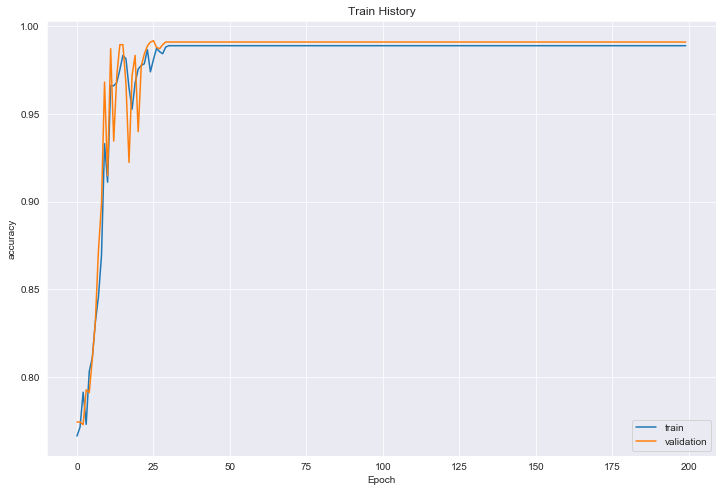

In [22]:
show_train_history(history,'accuracy','val_accuracy')

Já no que toca à curva da *loss*, é notório que o valor desce de forma adequada à medida que o treino é efetuado, não apresentando sinais de *overfitting*.

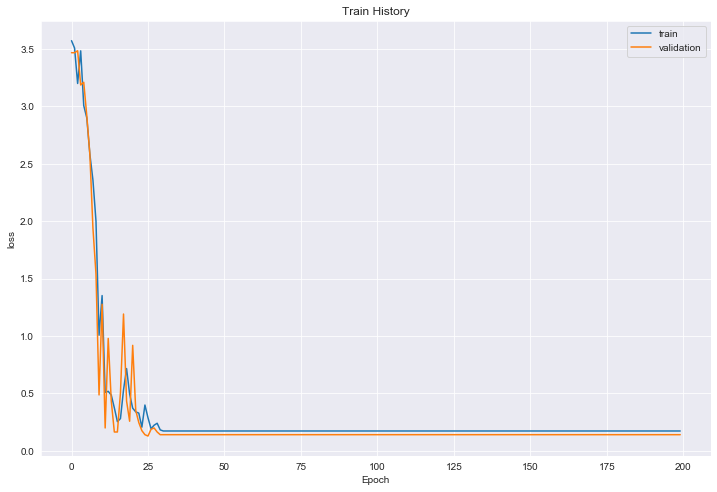

In [23]:
show_train_history(history,'loss','val_loss')

### Teste

Para testar o modelo treinado, é necessário separar o conjunto de teste em *features* e *labels*, tal como aconteceu com o conjunto de treino.

In [27]:
X = teste.loc[:, teste.columns != 'LABEL']
x_test = X.values
Y = teste['LABEL']

# One Hot Encoding
y_test = to_categorical(Y.values)
y_test = y_test[:, 1:]

Tendo em conta o armazenamento do melhor modelo, este deve ser carregado numa variável para o teste dos dados ser efetuado.

In [28]:
model = load_model('best_model.pkl')

Efetuada a previsão do conjunto de teste, tendo em conta que as variáveis de decisão são categóricas, estas têm que ser convertidas de modo a ser efetuada uma comparação com os valores reais.

In [29]:
from sklearn.metrics import accuracy_score, classification_report
test_preds = model.predict_classes(x_test)
test_preds = to_categorical(test_preds)

Observando as métricas, é possível constatar que a métrica de precisão na classe minoritária é 0.0, tal como o *recall*, pelo que este tipo de modelo não parece ser o mais apropriado para tratar dados em que a ordem de ocorrência dos dados acontece.

In [30]:
print(classification_report(y_test, test_preds))
accuracy_score(y_test, test_preds)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       565
           1       0.00      0.00      0.00         5

   micro avg       0.99      0.99      0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570
 samples avg       0.99      0.99      0.99       570



0.987719298245614

Pela análise das matrizes de confusão de ambas as classes, é visível que o modelo não classificou corretamente nenhum dos 5 sistemas com exoplanetas. É, também, importante mencionar que classificou de forma errada 2 sistemas como possuindo exoplanetas. Talvez com algum aperfeiçoamento este modelo mostrasse melhores resultados. No entanto, não é um modelo aconselhado aquando do tratamento de dados temporais, segundo a literatura.

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, test_preds)

array([[[  0,   5],
        [  2, 563]],

       [[563,   2],
        [  5,   0]]])